In [1]:
import re
import numpy as np
import pandas as pd
from os import path
from collections import Counter
from glob import glob
from lxml import etree
from tqdm import tqdm
import seaborn as sns
from scipy.stats import pearsonr

In [2]:
df_corpus = pd.read_csv(r'../metadata/corpus.csv')
#df_meta_data = pd.read_csv(r'../metadata/meta_data_canons.csv')
df_meta_data = pd.read_csv(r'../metadata/meta_data_last_version.csv')
df_corpus_canon = pd.read_csv(r'../metadata/corpus_canons.csv')

#### Get list doc name & gender & auteur_canon from metadata/corpus.csv

In [3]:
list_doc_name = df_corpus.doc_name
list_auteur = df_corpus.auteur
list_titre = df_corpus.titre
list_date = df_corpus.date
list_gender = df_corpus.gender
list_auteur_canon = df_corpus.canon

#### Get list roman_canon from metadata/corpus_canon.csv

In [4]:
list_roman_canon = df_corpus_canon.canon

#### Get lists presence in canon ? 0, 1 from metadata/meta_data_canons.csv

In [5]:
def get_list_presence_roman(list_titre, df_meta_data, feature_wanted):
    list_feature_wanted = []
    for elem in list_titre:
        if feature_wanted not in list(df_meta_data.columns):
            print('feature_wanted do not exist')
            return
        else :
            if elem in list(df_meta_data[feature_wanted]):
                list_feature_wanted.append(1)                
            else:
                list_feature_wanted.append(0)
    return list_feature_wanted

In [ ]:
list_bac = get_list_presence_roman(list_titre, df_meta_data, 'bac')
list_brevet = get_list_presence_roman(list_titre, df_meta_data, 'brevet')
list_lm = get_list_presence_roman(list_auteur, df_meta_data, 'lm')
list_sup = get_list_presence_roman(list_titre, df_meta_data, 'sup')
list_prix = get_list_presence_roman(list_titre, df_meta_data, 'prix')
list_gf = get_list_presence_roman(list_titre, df_meta_data, 'gf')
list_pleiade = get_list_presence_roman(list_auteur, df_meta_data, 'pleiade')
list_gouv = get_list_presence_roman(list_titre, df_meta_data, 'gouv')

In [ ]:
zipped = list(zip(list_doc_name, list_date, list_auteur, list_titre, list_roman_canon, list_auteur_canon, list_gender, list_bac, list_brevet, list_lm, list_sup, list_prix, list_gf, list_pleiade, list_gouv))

In [ ]:
df_canon_spec = pd.DataFrame(zipped, columns=["doc_name", "date", "auteur", "titre", "canon_roman", "canon_auteur", "gender", "bac", "brevet", "lm", 'sup', 'prix', 'gf', 'pleiade', 'gouv'])

In [ ]:
df_canon_spec

In [90]:
df_canon_spec.bac.value_counts()

0    2889
1      72
Name: bac, dtype: int64

In [91]:
df_canon_spec.brevet.value_counts()

0    2927
1      34
Name: brevet, dtype: int64

In [92]:
df_canon_spec.lm.value_counts()

0    2389
1     572
Name: lm, dtype: int64

In [93]:
df_canon_spec.sup.value_counts()

0    2933
1      28
Name: sup, dtype: int64

In [95]:
df_canon_spec.prix.value_counts()

0    2900
1      61
Name: prix, dtype: int64

In [96]:
df_canon_spec.gouv.value_counts()

0    2922
1      39
Name: gouv, dtype: int64

In [97]:
df_canon_spec.gf.value_counts()

0    2913
1      48
Name: gf, dtype: int64

In [98]:
df_canon_spec.pleiade.value_counts()

0    2373
1     588
Name: pleiade, dtype: int64

# SEE GF PRIX BAC CEST QUOI LES HISTOIRES

In [99]:
df_canon_spec.to_csv(r'../metadata/df_canon_spec.csv')

<AxesSubplot:xlabel='pleiade', ylabel='lm'>

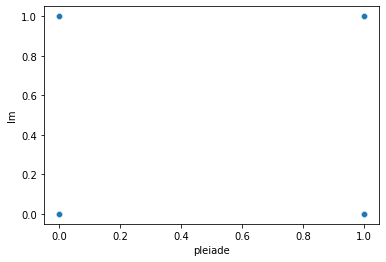

In [100]:
sns.scatterplot(x='pleiade', y="lm", data=df_canon_spec)

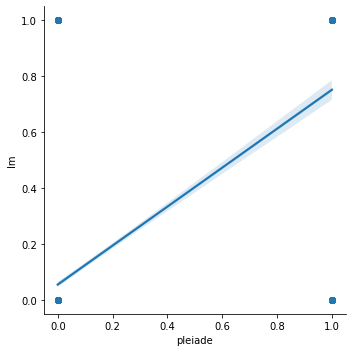

In [101]:
sns.lmplot(data=df_canon_spec, x="pleiade", y="lm")

<AxesSubplot:xlabel='pleiade', ylabel='lm'>

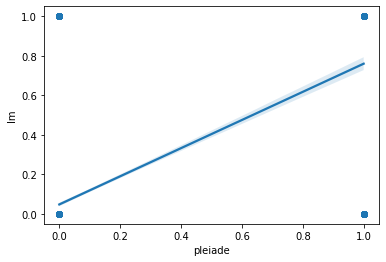

In [87]:
sns.regplot(data=df_canon_spec, x="pleiade", y="lm")

In [88]:
np.corrcoef(df_canon_spec['pleiade'], df_canon_spec['lm'])

array([[1.        , 0.72671975],
       [0.72671975, 1.        ]])

In [91]:
pearsonr(df_canon_spec['pleiade'], df_canon_spec['lm'])

(0.7267197533615285, 0.0)

<AxesSubplot:xlabel='bac', ylabel='sup'>

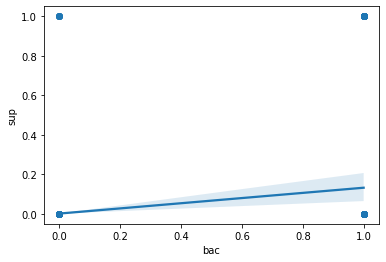

In [93]:
sns.regplot(data=df_canon_spec, x="bac", y="sup")

In [102]:
np.corrcoef(df_canon_spec['gf'], df_canon_spec['gouv'])

array([[1.        , 0.25882998],
       [0.25882998, 1.        ]])